In [48]:
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration
import requests
import cv2 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# processor = Pix2StructProcessor.from_pretrained('google/deplot')
# model = Pix2StructForConditionalGeneration.from_pretrained('google/deplot')

# url = "https://raw.githubusercontent.com/vis-nlp/ChartQA/main/ChartQA%20Dataset/val/png/5090.png"
# image = Image.open(requests.get(url, stream=True).raw)

# inputs = processor(images=image, text="Generate underlying data table of the figure below:", return_tensors="pt")
# predictions = model.generate(**inputs, max_new_tokens=512)
# print(processor.decode(predictions[0], skip_special_tokens=True))


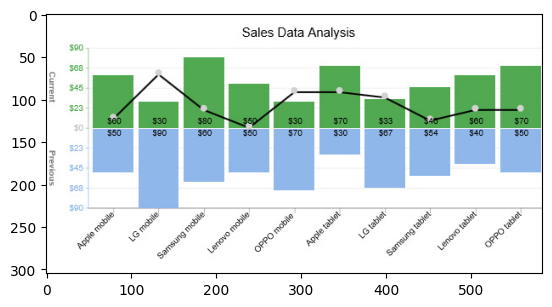

In [5]:
img = plt.imread(r"C:\Users\dai\Downloads\sales-data-analysis-examples-2.jpg")
plt.imshow(img)
plt.show()

In [17]:
import seaborn as sns
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [18]:
df.dropna(inplace=True)

In [19]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

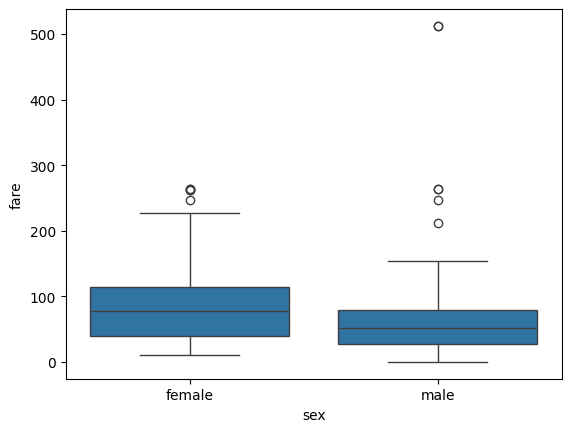

In [35]:
sns.boxplot(data=df,y= 'fare',x= 'sex')
plt.show()


In [ ]:
processor = Pix2StructProcessor.from_pretrained('google/deplot')
model = Pix2StructForConditionalGeneration.from_pretrained('google/deplot')



'TITLE | Sales Data Analysis <0x0A>  | μeau<0x0A>smoothaud <0x0A> Apple mobile | 360 <0x0A> LG mobile | 390 <0x0A> Samsung mobile* | 380 <0x0A> Lenovo mobile | 350 <0x0A> OPPO mobile | 330 <0x0A> Apple tablet | 330 <0x0A> LG tablet | 333 <0x0A> Samsung tablet | 340 <0x0A> Lenovo tablet | 340 <0x0A> OPPO tablet | 350'

In [56]:
img = plt.imread(r"C:\Users\dai\Desktop\box.png")

# 2. Convert from float32 (0.0-1.0) to uint8 (0-255)
# This is the most important step!
if img.dtype == np.float32:
    img = (img * 255).astype(np.uint8)

# 3. Handle channels (RGBA to RGB)
if img.shape[2] == 4:
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)

# 4. Resize (interpolation=cv2.INTER_CUBIC is excellent for text clarity)
img = cv2.resize(img, (1920, 1080), interpolation=cv2.INTER_CUBIC)

print(f"Final Shape: {img.shape}, Final Dtype: {img.dtype}")

Final Shape: (1080, 1920, 3), Final Dtype: uint8


In [57]:
# img = plt.imread(r"C:\Users\dai\Desktop\box.png")
# img   = cv2.cvtColor(img,cv2.COLOR_RGBA2RGB)
# img = cv2.resize(img,(1000,1000),interpolation=cv2.INTER_CUBIC)
# print(img.dtype)
inputs = processor(images = img,text="Identify the X-axis labels and their corresponding Y-axis values. Generate a table with two columns: 'Label' and 'Value'.",return_tensors = 'pt')
predictions  = model.generate(**inputs,max_new_tokens = 512,num_beams=5)
processor.decode(predictions[0],skip_special_tokens = True)

'TITLE |  <0x0A> sex | fare <0x0A> female | 115 <0x0A> male | 80'

In [58]:
img = plt.imread(r"C:\Users\dai\Desktop\box.png")
img = cv2.cvtColor(img,cv2.COLOR_RGBA2RGB)
img = cv2.resize(img, (1920,1080), interpolation=cv2.INTER_CUBIC)
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# plt.imshow(img)
# plt.axis('off')

np.float32(1.2212774)